<a href="https://colab.research.google.com/github/simonemallei/complex-systems-social-graph/blob/main/recommender_social_graph/content/notebook/Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository used in the notebook:

Printing the files' names in its "recommender_social_graph" directory:

In [1]:
import sys
print(sys.path)

['d:\\VS Code\\complex-systems-social-graph\\recommender_social_graph\\content\\notebook', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\python38.zip', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\DLLs', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38', '', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32\\lib', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\Pythonwin']


Importing mandatory methods for the notebook:

In [2]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import sys
import copy
sys.path.append('.')
sys.path.append('../../')
%load_ext autoreload
%autoreload 2
from graph_creation import create_graph
from abeba_methods import simulate_epoch, compute_activation
from metrics import polarisation, sarle_bimodality, disagreement
from content.metrics import feed_entropy, feed_satisfaction
from content.content_recommender import simulate_epoch_content_recommender

Creation and print of a graph:

ENDED
Starting graph: 
  node label    opinion value
------------  ---------------
           0            0.818
           1            0.194
           2            0.321
           3           -0.843
           4           -0.984
           5            0.183
           6            0.762
           7           -0.359
           8            0.172
           9           -0.82
          10           -0.014
          11           -0.701
          12           -0.03
          13           -0.476
          14            0.317
          15            0.141
          16           -0.141
          17            0.393
          18           -0.482
          19            0.58
          20           -0.165
          21           -0.264
          22            0.11
          23           -0.959
          24            0.478
          25           -0.227
          26           -0.266
          27           -0.378
          28            0.456
          29            0.828
          30         

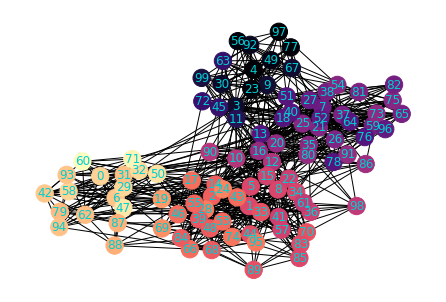

In [3]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(100, [5], avg_friend = 10, prob_post = [0.5], hp_alpha=2, hp_beta=0.3)
#G = apply_initial_feed(G)
print("ENDED")
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating 100 updates of 2 graphs:
- Previous graph with no recommender
- Previous graph with random content recommender

Then showing the two graphs' opinions and their polarisation value.

ENDED COPY
Epoch	Random	Normal	Nudge	Nudge Var
0
Polarisation (RANDOM): 31.025993844264637
Bimodality (RANDOM): -1.0168951847974026
Disagreement (RANDOM - mean): 0.15391086172349877
Disagreement (RANDOM - std): 0.1161215715832081
Disagreement (RANDOM - coverage): 100.0%
Entropy (RANDOM - mean): 0.0
Entropy (RANDOM - std): 0.0
Entropy (RANDOM - coverage): 50.0%
Satisfaction (RANDOM - mean): 0.37802065963947057
Satisfaction (RANDOM - std): 0.4622818348829998
Satisfaction (RANDOM - coverage): 50.0%
Polarisation (NORMAL): 23.5326931956716
Bimodality (NORMAL): -1.533341086941262
Disagreement (NORMAL - mean): 0.12870047149830396
Disagreement (NORMAL - std): 0.10234361756894034
Disagreement (NORMAL - coverage): 100.0%
Entropy (NORMAL - mean): 0.0
Entropy (NORMAL - std): 0.0
Entropy (NORMAL - coverage): 50.0%
Satisfaction (NORMAL - mean): 0.4784777346029959
Satisfaction (NORMAL - std): 0.2176152877154876
Satisfaction (NORMAL - coverage): 50.0%
Polarisation (NUDGE): 29.01644713124147
Bimodality

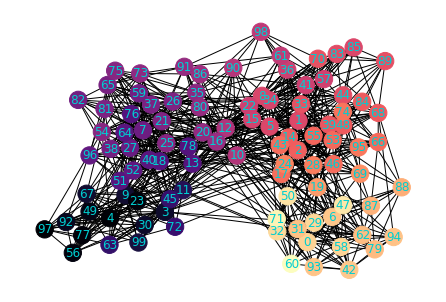

No Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            1
           1            1
           2            1
           3           -1
           4           -0.934
           5            1
           6            0.904
           7           -1
           8            1
           9           -1
          10            1
          11           -1
          12            1
          13           -1
          14            1
          15            1
          16           -1
          17            1
          18           -1
          19            0.909
          20           -1
          21           -1
          22            1
          23           -1
          24            1
          25           -1
          26           -1
          27           -1
          28            0.958
          29            0.93
          30           -1
          31            1
          32            1
          33            1
          34   

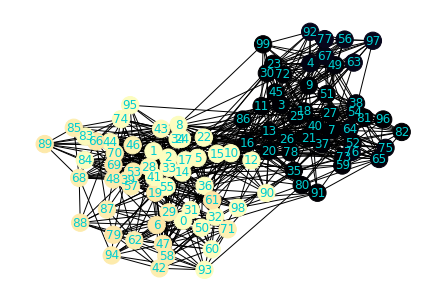

Random Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            1
           1            1
           2            1
           3           -1
           4           -1
           5            1
           6            0.941
           7           -1
           8            1
           9           -1
          10            1
          11           -1
          12            1
          13           -1
          14            1
          15            1
          16           -1
          17            1
          18           -1
          19            0.939
          20           -1
          21           -1
          22            1
          23           -1
          24            1
          25           -1
          26           -1
          27           -0.983
          28            1
          29            1
          30           -1
          31            1
          32            0.938
          33            1
          34  

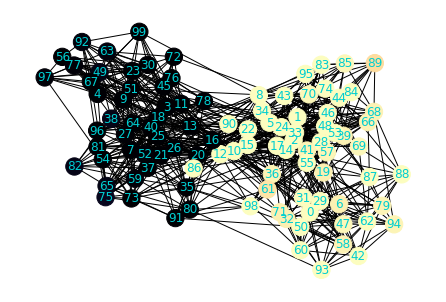

Normal Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.181
           1            0.105
           2            0.109
           3           -0.127
           4           -0.15
           5            0.056
           6            0.184
           7           -0.153
           8            0.053
           9           -0.127
          10            0.067
          11           -0.066
          12            0.04
          13           -0.037
          14            0.072
          15            0.063
          16           -0.003
          17            0.115
          18           -0.102
          19            0.169
          20            0.002
          21           -0.03
          22            0.08
          23           -0.133
          24            0.076
          25           -0.021
          26           -0.055
          27           -0.032
          28            0.058
          29            0.124
          30      

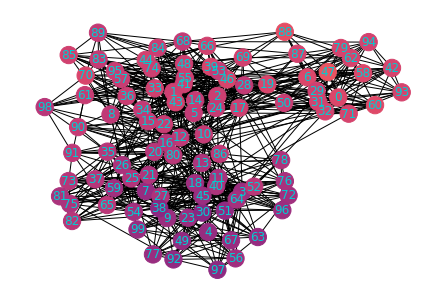

Nudge Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.877
           1            0.9
           2            1
           3           -1
           4           -0.809
           5            1
           6            0.768
           7           -0.901
           8            1
           9           -0.94
          10            0.931
          11           -1
          12            1
          13           -1
          14            0.898
          15            1
          16           -1
          17            0.954
          18           -0.935
          19            0.782
          20           -1
          21           -1
          22            1
          23           -1
          24            0.948
          25           -1
          26           -1
          27           -0.892
          28            0.847
          29            0.789
          30           -0.864
          31            1
          32          

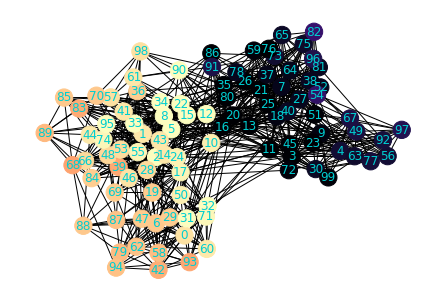

Similar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.622
           1            0.579
           2            0.589
           3           -0.547
           4           -0.563
           5            0.585
           6            0.659
           7           -0.521
           8            0.536
           9           -0.56
          10           -0.538
          11           -0.569
          12           -0.492
          13           -0.521
          14            0.607
          15            0.603
          16           -0.538
          17            0.65
          18           -0.546
          19            0.648
          20           -0.535
          21           -0.528
          22            0.614
          23           -0.568
          24            0.607
          25           -0.519
          26           -0.516
          27           -0.543
          28            0.566
          29            0.653
          30   

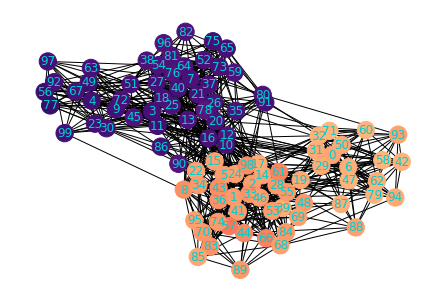

Unsimilar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            1
           1            1
           2            1
           3           -1
           4           -1
           5            1
           6            0.262
           7           -1
           8            1
           9           -1
          10            1
          11           -1
          12           -1
          13           -1
          14            1
          15            1
          16           -1
          17            1
          18           -1
          19            1
          20           -1
          21           -1
          22            1
          23           -1
          24            1
          25           -1
          26           -1
          27           -1
          28            1
          29            1
          30           -1
          31            1
          32            0.636
          33            1
          34       

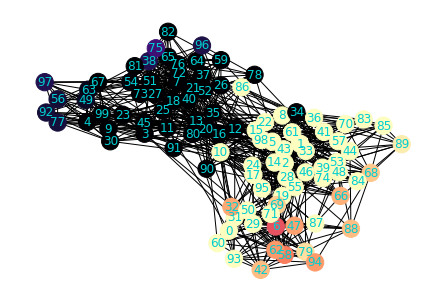

Polarisation (starting): 29.016447131241474
Bimodality (starting): -1.0920033317855717
Disagreement (starting - mean): 0.12571776455770908
Disagreement (starting - std): 0.09778585275237105
Entropy (starting - mean): nan
Entropy (starting - std): nan
Satisfaction (starting - mean): nan
Satisfaction (starting - std): nan
Polarisation (no recommender): 93.38530182760849
Bimodality (no recommender): -0.5322035875036704
Disagreement (no recommender - mean): 0.2848156615073744
Disagreement (no recommender - std): 0.2600022061094723
Entropy (no recommender - mean): nan
Entropy (no recommender - std): nan
Satisfaction (no recommender - mean): nan
Satisfaction (no recommender - std): nan
Polarisation (random recommender): 95.40756168243992
Bimodality (random recommender): -0.5459601538403169
Disagreement (random recommender - mean): 0.2851119529838542
Disagreement (random recommender - std): 0.26406844525940787
Entropy (random recommender - mean): 0.2889756205249821
Entropy (random recommender

c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.

Entropy (unsimilar recommender - mean): 0.5344197432907932
Entropy (unsimilar recommender - std): 0.22746688883550933
Satisfaction (unsimilar recommender - mean): 0.15126555375901976
Satisfaction (unsimilar recommender - std): 0.4395625086276521


In [4]:
# Simulating an epoch and printing the opinion graph obtained
starting_G = copy.deepcopy(G)
random_G = copy.deepcopy(G)
normal_G = copy.deepcopy(G)
nudge_G = copy.deepcopy(G)
similar_G = copy.deepcopy(G)
unsimilar_G = copy.deepcopy(G)
print("ENDED COPY")
random_param = {'n_post': 1}
normal_param = {'normal_mean': 0.0, 'normal_std': 0.1, 'n_post': 1}
nudge_param = {'nudge_goal': 0.0, 'n_post': 1}
similar_param = {'similar_thresh': 0.5}
unsimilar_param = {'unsimilar_thresh': 0.5}
print(f'Epoch\tRandom\tNormal\tNudge\tNudge Var')
for i in range(20):
    G = simulate_epoch(G, 0.5, epsilon = 0.1)
    random_G = simulate_epoch_content_recommender(random_G, 0.5, epsilon = 0.1,
                                                    strat_param=random_param, estim_strategy="kalman")
    normal_G = simulate_epoch_content_recommender(normal_G, 0.5, epsilon = 0.1,
                                                    strategy="normal", 
                                                    strat_param=normal_param, estim_strategy="kalman")
    nudge_G = simulate_epoch_content_recommender(nudge_G, 0.5, epsilon = 0.1,
                                                    strategy="nudge", 
                                                    strat_param=nudge_param, estim_strategy="kalman")
    similar_G = simulate_epoch_content_recommender(similar_G, 0.5, epsilon = 0.1, 
                                                      strategy="similar", 
                                                      strat_param=similar_param, estim_strategy="kalman")
    unsimilar_G = simulate_epoch_content_recommender(unsimilar_G, 0.5, epsilon = 0.1, 
                                                        strategy="unsimilar",
                                                        strat_param=unsimilar_param, estim_strategy="kalman")
    print(i)
    graphs = [random_G, normal_G, nudge_G, similar_G, unsimilar_G]
    rec_text = ["RANDOM", "NORMAL", "NUDGE", "SIMILAR", "UNSIMILAR"]
    for curr_G, text in zip(graphs, rec_text):
        print(f"Polarisation ({text}): {polarisation(curr_G)}")
        print(f"Bimodality ({text}): {sarle_bimodality(curr_G)}")
        #print(f"Disagreement ({text}): {disagreement(g)}")
        disagreement_res = disagreement(curr_G)
        if not(disagreement_res == {}):
            disagreement_means = [value[0] for value in disagreement_res.values()]
            print(f"Disagreement ({text} - mean): {np.mean(disagreement_means)}")
            print(f"Disagreement ({text} - std): {np.std(disagreement_means)}")
            dis_coverage = np.round(len(disagreement_means.values()) / len(G.nodes()) * 100, 3)
            print(f"Disagreement ({text} - coverage): {dis_coverage}%")      
        #print(f"Entropy ({text}): {feed_entropy(g)}")
        entropy_res = feed_entropy(curr_G)
        if not(entropy_res == {}):
            print(f"Entropy ({text} - mean): {np.mean(list(entropy_res.values()))}")
            print(f"Entropy ({text} - std): {np.std(list(entropy_res.values()))}")
            entr_coverage = np.round(len(list(entropy_res.values())) / len(G.nodes()) * 100, 3)
            print(f"Entropy ({text} - coverage): {entr_coverage}%")     
        #print(f"Satisfaction ({text}): {feed_satisfaction(g)}")
        satisfaction_res = feed_satisfaction(curr_G)
        if not(satisfaction_res == {}):
            print(f"Satisfaction ({text} - mean): {np.mean(list(satisfaction_res.values()))}")
            print(f"Satisfaction ({text} - std): {np.std(list(satisfaction_res.values()))}")
            sat_coverage = np.round(len(list(satisfaction_res.values())) / len(G.nodes()) * 100, 3)
            print(f"Satisfaction ({text} - coverage): {sat_coverage}%")      


# Showing starting graph and its nodes' opinions
colors = list(nx.get_node_attributes(starting_G, 'opinion').values())
labels =  nx.get_node_attributes(starting_G, 'opinion')
print("Starting Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Starting Graph:")
nx.draw(starting_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()


# Showing graph with no recommender and its nodes' opinions
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print("No Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("No Recommender Graph:")
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with random content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(random_G, 'opinion').values())
labels =  nx.get_node_attributes(random_G, 'opinion')
print("Random Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Random Recommender Graph:")
nx.draw(random_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with normal content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(normal_G, 'opinion').values())
labels =  nx.get_node_attributes(normal_G, 'opinion')
print("Normal Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Normal Recommender Graph:")
nx.draw(normal_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with nudge content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(nudge_G, 'opinion').values())
labels =  nx.get_node_attributes(nudge_G, 'opinion')
print("Nudge Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Nudge Recommender Graph:")
nx.draw(nudge_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with similar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(similar_G, 'opinion').values())
labels =  nx.get_node_attributes(similar_G, 'opinion')
print("Similar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Similar Recommender Graph:")
nx.draw(similar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with unsimilar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(unsimilar_G, 'opinion').values())
labels =  nx.get_node_attributes(unsimilar_G, 'opinion')
print("Unsimilar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Unsimilar Recommender Graph:")
nx.draw(unsimilar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

graphs = [starting_G, G, random_G, normal_G, nudge_G, similar_G, unsimilar_G]
rec_text = ["starting", "no recommender", "random recommender", "normal recommender",
            "nudge recommender", "similar recommender", 
            "unsimilar recommender"]
for g, text in zip(graphs, rec_text):
    print(f"Polarisation ({text}): {polarisation(g)}")
    print(f"Bimodality ({text}): {sarle_bimodality(g)}")
    disagreement_means = [value[0] for value in disagreement_res.values()]
    print(f"Disagreement ({text} - mean): {np.mean(disagreement_means)}")
    print(f"Disagreement ({text} - std): {np.std(disagreement_means)}")
    print(f"Entropy ({text} - mean): {np.mean(list(feed_entropy(g).values()))}")
    print(f"Entropy ({text} - std): {np.std(list(feed_entropy(g).values()))}")
    print(f"Satisfaction ({text} - mean): {np.mean(list(feed_satisfaction(g).values()))}")
    print(f"Satisfaction ({text} - std): {np.std(list(feed_satisfaction(g).values()))}")